<a href="https://colab.research.google.com/github/Sai-Vara-Prasad-Lekkalapudi/major-project/blob/main/Major_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Major project

##Project Topic:
Financial Feature Optimization for Corporate Bankruptcy Prediction using Gradient Boosting Models.

##Dataset: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data
##Research question:
Which financial indicators are most influential in predicting corporate bankruptcy, and how does feature selection affect model performance
##Goal:
My aim is to identify the most important financial features influencing bankruptcy prediction and to understand how feature selection and dimensionality reduction affect both accuracy and interpretability of machine learning models.


In [4]:
# Step 1: Import libraries
import pandas as pd
from scipy.io import arff
import urllib.request

# Step 2: Download the ARFF file locally
url = 'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/1year.arff'
local_path = '/content/1year.arff'
urllib.request.urlretrieve(url, local_path)

# Step 3: Load the ARFF file
data, meta = arff.loadarff(local_path)

# Step 4: Convert to pandas DataFrame
df = pd.DataFrame(data)

# Step 5: Display the first few rows and info
print("First 5 rows of the data:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


First 5 rows of the data:
      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63

The dataset contains financial information for 7027 Polish companies, each described by 64 numerical financial indicators (named Attr1 to Attr64) and one target label ("class") that shows bankruptcy status (0 = not bankrupt, 1 = bankrupt). The data includes some missing values for several features, a sign of real-world financial datasets. Each feature represents a different financial ratio or company metric.

In [7]:
# Importing required libraries
import pandas as pd
from scipy.io import arff
import urllib.request

#  List all 5 years ARFF file URLs from github raw data
urls = [
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/1year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/2year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/3year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/4year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/5year.arff'
]

# Downloading and loading each file into a dictionary of DataFrames
dfs = {}
for url in urls:
    year = url.split('/')[-1].split('.')[0]
    local_path = f'/content/{year}.arff'
    urllib.request.urlretrieve(url, local_path)
    data, meta = arff.loadarff(local_path)
    dfs[year] = pd.DataFrame(data)
    print(f"\nLoaded {year}: shape = {dfs[year].shape}")
    print(dfs[year].info())




Loaded 1year: shape = (7027, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Att

I have successfully loaded all five datasets (1-year to 5-year) from the Polish Companies Bankruptcy dataset. Each file represents a different forecasting horizon - predicting whether a company will go bankrupt within 1 to 5 years.

Each dataset contains 64 financial indicators and 1 target variable (class), showing if a firm is bankrupt (b) or non-bankrupt (n). The number of records varies slightly across years, but all share the same structure and features.

From my observation:

The schema of all files is consistent (Attr1 - Attr64 + class).

Some attributes have missing values (especially in Attr21, Attr37, Attr45, and Attr60).

There is a high class imbalance — only a small portion of companies are bankrupt.

This gives me a clear base to proceed with data preprocessing, feature selection, and model training for bankruptcy prediction.

Dataset Shape: (7027, 65)
Number of Missing Values:
 5835


/tmp/ipython-input-2383063611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


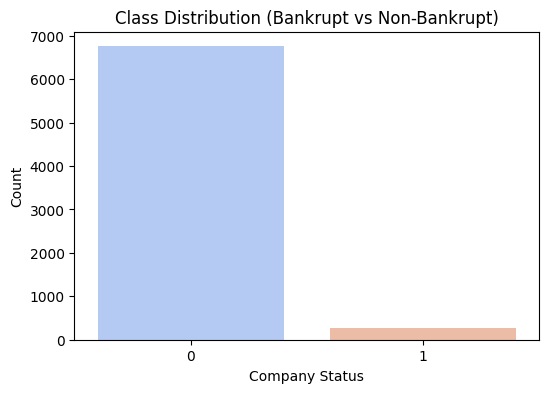

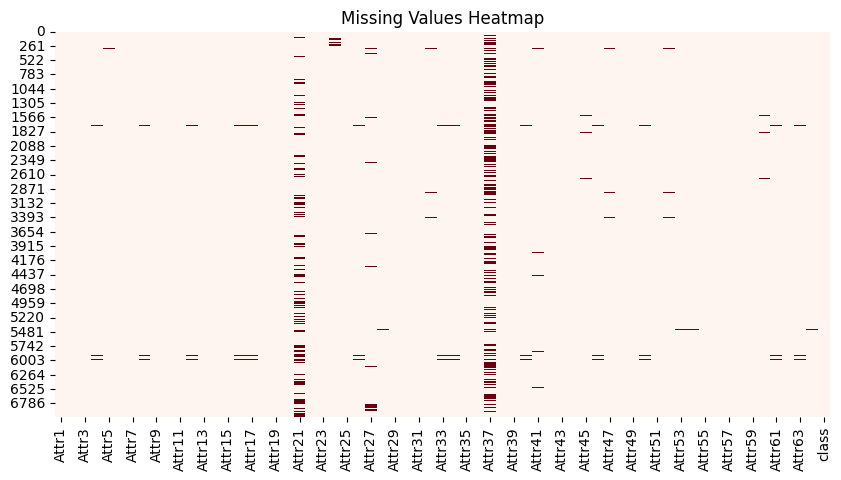

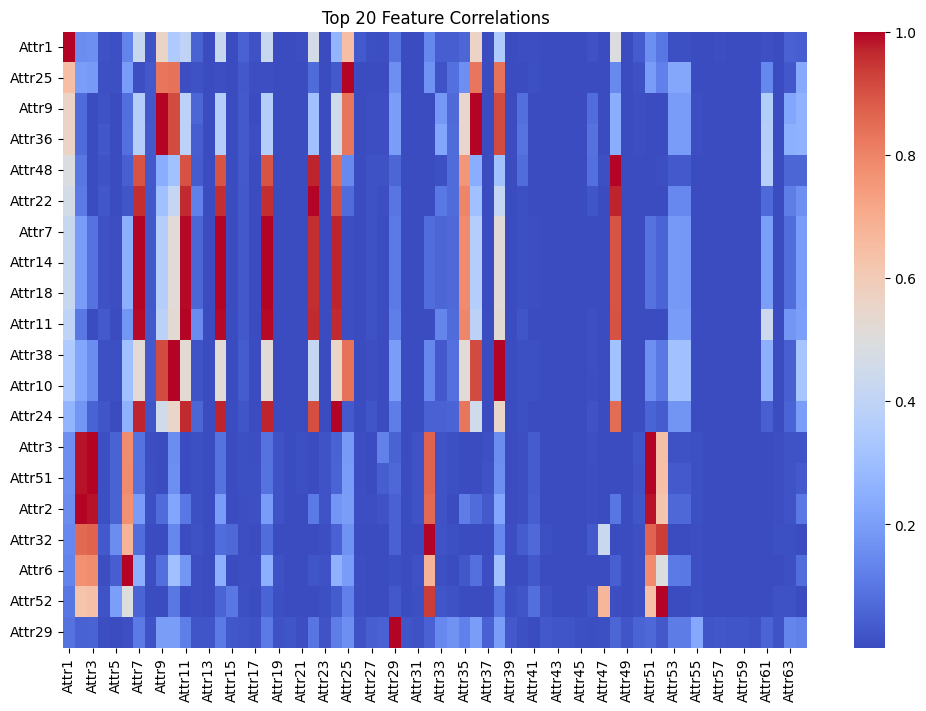

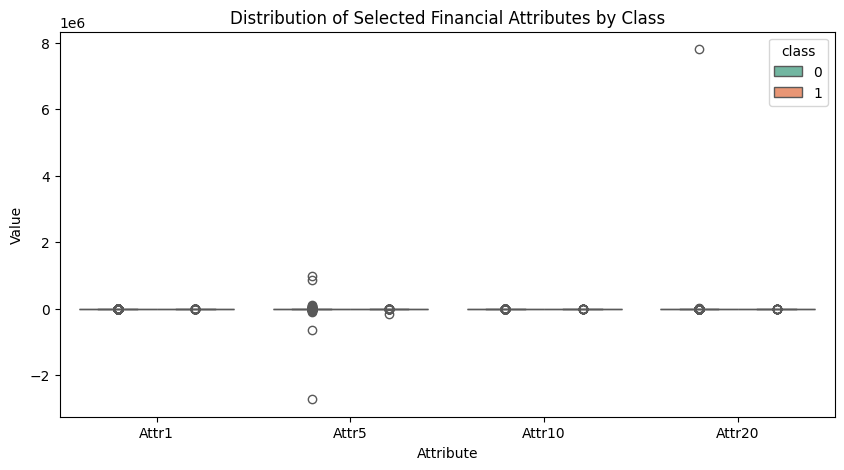

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['1year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()
